In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'D:\Tiss-2025\Advertising.csv')
df.shape

(200, 4)

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


## Inference   
- Is there a relationship between sales and advertising budget?
- How strong is the relationship?
- Which media are associated with sales?
- How large is the association between each medium and sales?
- How accurately can we predict future sales?
- Is the relationship linear?
- Is there synergy among the advertising media?  

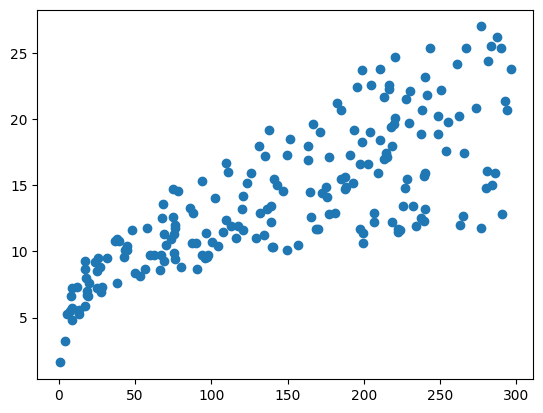

In [4]:
plt.scatter(df['TV'], df['sales'])
plt.show()

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
X = df['TV'].array.reshape(-1, 1)
X.shape
model = LinearRegression()
model.fit(X, df['sales'])

LinearRegression()

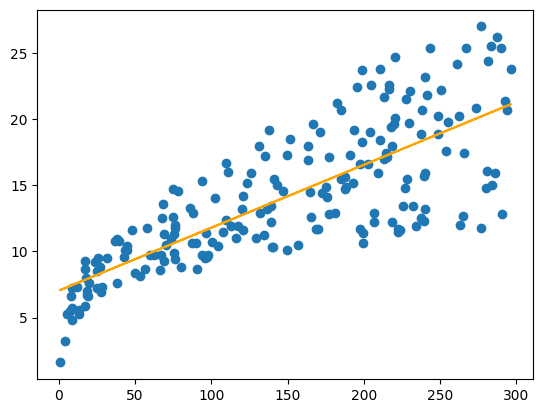

In [7]:
plt.scatter(df['TV'], df['sales'])
plt.plot(df['TV'], model.predict(X), color='orange')
plt.show()

In [8]:
from IPython.display import display, Latex
display(Latex(f'Fitted model is $sales = {model.intercept_:.3f} + {model.coef_[0]:.3f} * TV$'))

<IPython.core.display.Latex object>

## Model Fit ($R^2$)
- One of the most common numerical measures of model fit is the $R^2$
- $R^2$ = The fraction of variance explained
- An $R^2$ value close to 1 indicates that the model explains a large portion of the variance in the response variable

In [9]:
r_sq = model.score(X, df['sales'])
display(Latex(f'$R^2 = {r_sq:.3f}$'))

<IPython.core.display.Latex object>

## Using 2 variables (TV and Radio)  
- $sales = \beta_0 + \beta_1 * TV + \beta_2 * radio$

In [10]:
X = df[['TV', 'radio']]
y = df['sales']

In [11]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [12]:
display(Latex(f'Fitted model is $sales = {model.intercept_:.3f} + {model.coef_[0]:.3f} * TV + {model.coef_[1]:.3f} * radio$'))

<IPython.core.display.Latex object>

In [13]:
r_sq = model.score(X, y)
display(Latex(f'$R^2 = {r_sq:.4f}$'))

<IPython.core.display.Latex object>

## Using 2 variables (TV and newspaper)  
- $sales = \beta_0 + \beta_1 * TV + \beta_2 * newspaper$

In [14]:
X = df[['TV', 'newspaper']]
y = df['sales']

In [15]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [16]:
display(Latex(f'Fitted model is $sales = {model.intercept_:.3f} + {model.coef_[0]:.3f} * TV + {model.coef_[1]:.3f} * newspaper$'))

<IPython.core.display.Latex object>

In [17]:
r_sq = model.score(X, y)
display(Latex(f'$R^2 = {r_sq:.4f}$'))

<IPython.core.display.Latex object>

## Using all the three variables (TV, radio and newspaper)  
- $sales = \beta_0 + \beta_1 * TV + \beta_2 * radio + \beta_3 * newspaper$

In [18]:
X = df[['TV', 'radio', 'newspaper']]
y = df['sales']

In [19]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [20]:
display(Latex(f'Fitted model is $sales = {model.intercept_:.3f} + {model.coef_[0]:.3f} * TV + {model.coef_[1]:.3f} * radio + {model.coef_[2]:.3f} * newspaper$'))

<IPython.core.display.Latex object>

In [21]:
r_sq = model.score(X, y)
display(Latex(f'$R^2 = {r_sq:.4f}$'))

<IPython.core.display.Latex object>

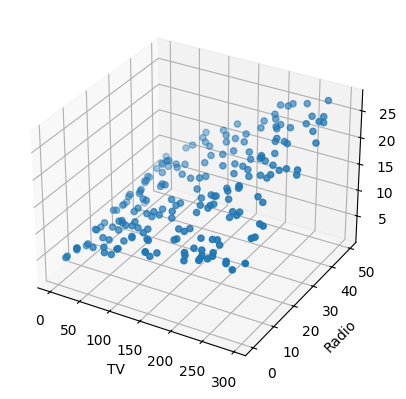

In [22]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(df['TV'], df['radio'], df['sales'])
#ax.plot_surface(xx, yy, z, color = 'cyan')
ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Sales')
plt.show()

In [23]:
# import numpy as np
# xx, yy = np.meshgrid(df['TV'], df['radio'])
# z = model.intercept_ + model.coef_[0] * xx + model.coef_[1] * yy

## More details from statsmodel

In [24]:
import statsmodels.api as sm

In [25]:
X = df[['TV', 'radio', 'newspaper']]
X = sm.add_constant(X)
y = df['sales']

In [26]:
model = sm.OLS(y, X, missing='drop')
model_result = model.fit()
model_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 06 Jan 2025   Prob (F-statistic):           1.58e-96
Time:                        22:12:44   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
X = df[['TV', 'radio']]
X = sm.add_constant(X)
y = df['sales']

In [28]:
model = sm.OLS(y, X, missing='drop')
model_result = model.fit()
model_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Mon, 06 Jan 2025   Prob (F-statistic):           4.83e-98
Time:                        22:12:45   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Diagnostics plot / Identify problems with regression model
https://www.statsmodels.org/dev/examples/notebooks/generated/linear_regression_diagnostics_plots.html   
https://www.statsmodels.org/dev/examples/notebooks/generated/regression_diagnostics.html  
### Non-linearity
- Plot residual vs fitted values

In [29]:
from scipy import signal

In [30]:
df_result = pd.DataFrame({'x': model_result.fittedvalues, 'y': model_result.resid})
df_result = df_result.sort_values(by = ['x'])

In [31]:
y=signal.savgol_filter(df_result['y'], 53, 3)

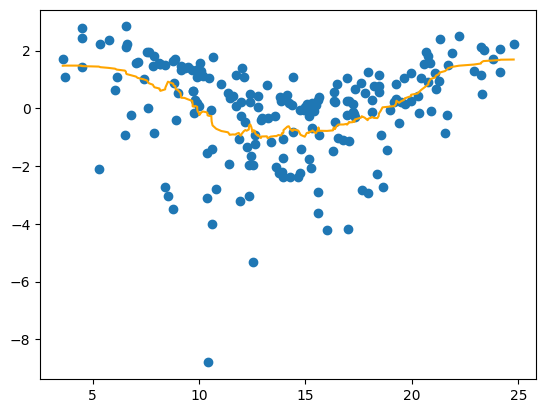

In [32]:
plt.scatter(df_result['x'], df_result['y'])
plt.plot(df_result['x'], y, color = 'orange')
plt.show()

In [33]:
model_result.resid.mean()

1.858069254012662e-14

### Heteroskedasticity (Non constant variance)  
-  When both the assumption of linearity and homoscedasticity are met, the points in the residual plot (residuals against predicted values) will be randomly scattered
-  Gauss–Markov theorem does not apply, meaning that OLS estimators are not the Best Linear Unbiased Estimators (BLUE) and their variance is not the lowest of all other unbiased estimators
-  Residuals can be tested for homoscedasticity using the Breusch–Pagan test
-  Heteroscedasticity usually does not cause bias in the model estimates (i.e. regression coefficients), but it reduces precision in the estimates. The standard errors are often underestimated, leading to incorrect p-values and inferences

![title](constant_variance_check.png)

### Outliers  
- An outlier is a point for which yi is far from the value predicted by the model
- Outliers can arise for a variety of reasons, such as incorrect recording of an observation during data collection
- We can plot the studentized residuals, computed by dividing each residual ei by its estimated standard error
- Typically we expect values between −3 and 3
- One solution is to simply remove the outlier observation if it is due to incorrect data collection
- Care should be taken, since an outlier may instead indicate a deficiency with the model

In [34]:
df_outlier = model_result.outlier_test()
df_outlier

,student_resid,unadj_p,bonf(p)
0,0.924793,0.356211,1.0
1,-1.169125,0.243773,1.0
2,-1.844698,0.066590,1.0
3,0.527423,0.598497,1.0
4,-0.193096,0.847084,1.0
...,...,...,...
195,1.346476,0.179704,1.0
196,0.926733,0.355205,1.0
197,0.019053,0.984818,1.0
198,1.028204,0.305121,1.0


In [35]:
df_outlier.loc[(df_outlier['student_resid'] < -3) |  (df_outlier['student_resid'] > 3)]

,student_resid,unadj_p,bonf(p)
5,-3.295069,1.167795e-03,0.233559
130,-5.714235,4.049876e-08,0.000008


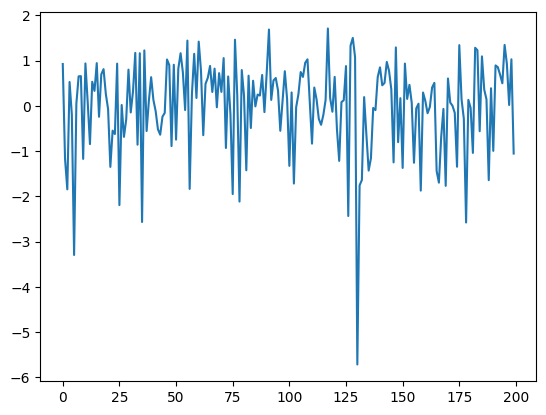

In [36]:
plt.plot(df_outlier['student_resid'])
plt.show()

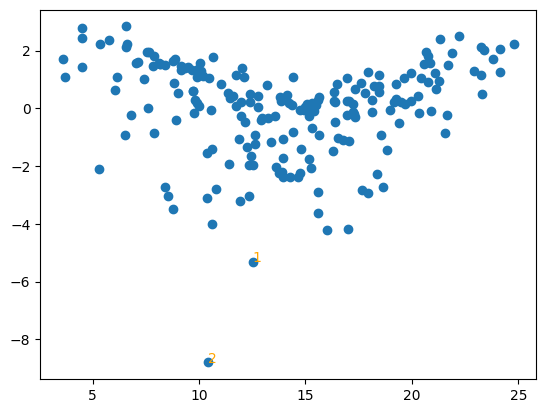

In [37]:
plt.scatter(model_result.fittedvalues, model_result.resid)
plt.text(model_result.fittedvalues[5], model_result.resid[5], '1', color = 'orange')
plt.text(model_result.fittedvalues[130], model_result.resid[130], '2', color = 'orange')
plt.show()

In [38]:
df = df.drop([5, 130], axis = 0)
df.shape

(198, 4)

In [39]:
X = df[['TV', 'radio']]
X = sm.add_constant(X)
y = df['sales']

In [40]:
## Notice the R^2
model = sm.OLS(y, X, missing='drop')
model_result = model.fit()
model_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     1045.
Date:                Mon, 06 Jan 2025   Prob (F-statistic):          6.26e-105
Time:                        22:12:51   Log-Likelihood:                -361.14
No. Observations:                 198   AIC:                             728.3
Df Residuals:                     195   BIC:                             738.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0519      0.265     11.505      0.000       2.529       3.575
TV             0.0442      0.001     34.837      0.000       0.042       0.047
radio          0.1953      0.007     26.697      0.000       0.181       0.210
==============================================================================
Omnibus:                       16.435   Durbin-Watson:                   2.164
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.512
Skew:                          -0.747   Prob(JB):                     9.55e-05
Kurtosis:                       3.105   Cond. No.                         426.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Leverage Points   
- observations with high leverage high have an unusual value for xi
- For simple linear regression:
  
  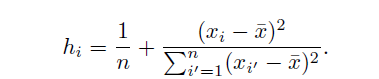

- h_i lies between 0 and 1
- The $i^{th}$ leverage score can be viewed as the 'weighted' distance between $x_i$ to the mean of $x_i$'s
- A common rule is to identify $x_{i}$ whose leverage value ${h}_{ii}$ is more than 2 times larger than the mean leverage i.e. $\frac{p}{n}$

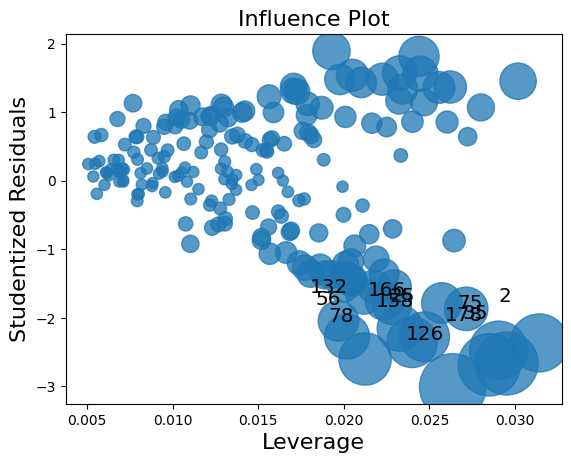

In [41]:
sm.graphics.influence_plot(model_result)
plt.show()

In [42]:
influence = model_result.get_influence()
leverage = influence.hat_matrix_diag

### Multicollinearity  
- A simple way to detect collinearity is to look at the correlation matrix of the predictors
- it is possible for collinearity to exist between three or more variables even if no pair of variables has a particularly high correlation, this is called multicollinearity  
- Multicollinearity is assessed using the variance inflation factor (VIF).
- The VIF for each variable can be computed

  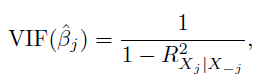

- where $R^{2}_{X_j |X_−j}$ is the $R^2$ from a regression of $X_j$ onto all of the other predictors
- VIF value that exceeds 10 indicates a problematic amount of collinearity

In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variance_inflation_factor(df[['TV', 'radio', 'newspaper']], 2)

3.0528491366852726

## Inference   
- Is there a relationship between sales and advertising budget?
- How strong is the relationship?
- Which media are associated with sales?
- How large is the association between each medium and sales?
- How accurately can we predict future sales?
- Is the relationship linear?
- Is there synergy among the advertising media?  

In [44]:
x = model_result.resid ** 2
x.sum() / (x.shape[0]-3)

2.2825184335466067

In [45]:
x.shape

(198,)

In [46]:
model_result.mse_resid ** .5

1.5108005935750115

In [47]:
df['radio_TV'] = df['radio'] * df['TV']
df.head()

,TV,radio,newspaper,sales,radio_TV
0,230.1,37.8,69.2,22.1,8697.78
1,44.5,39.3,45.1,10.4,1748.85
2,17.2,45.9,69.3,9.3,789.48
3,151.5,41.3,58.5,18.5,6256.95
4,180.8,10.8,58.4,12.9,1952.64


In [48]:
X = df[['TV', 'radio', 'radio_TV']]
X = sm.add_constant(X)
y = df['sales']

## Notice the R^2
model = sm.OLS(y, X, missing='drop')
model_result = model.fit()
model_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     2560.
Date:                Mon, 06 Jan 2025   Prob (F-statistic):          1.05e-155
Time:                        22:12:57   Log-Likelihood:                -238.12
No. Observations:                 198   AIC:                             484.2
Df Residuals:                     194   BIC:                             497.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.5901      0.216     30.530      0.000       6.164       7.016
TV             0.0199      0.001     15.235      0.000       0.017       0.022
radio          0.0430      0.008      5.379      0.000       0.027       0.059
radio_TV       0.0010   4.65e-05     21.867      0.000       0.001       0.001
==============================================================================
Omnibus:                       65.198   Durbin-Watson:                   2.240
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              174.371
Skew:                          -1.419   Prob(JB):                     1.37e-38
Kurtosis:                       6.617   Cond. No.                     1.82e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.82e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [49]:
rse = model_result.mse_resid ** .5
rse

0.8137291358353756